# Capstone Project: Predicting Failures in Power Transmission Lines

## 1. Business Understanding

#### Objective
The objective of this project is to develop a predictive model that can accurately forecast failures in power transmission lines before they occur. This will help optimize maintenance schedules and reduce downtime, ensuring efficient and reliable power delivery.

#### Context
Predictive maintenance in utility networks is crucial due to the high costs associated with equipment failures, both in terms of repair expenses and lost productivity. Accurate failure prediction can prevent costly unplanned outages and improve operational efficiency.

#### Goals
- Develop a predictive model with high accuracy and precision.
- Enable preemptive maintenance interventions.
- Minimize unplanned downtime and extend the lifespan of machinery.

#### Research Question
Can machine learning algorithms accurately predict failures in power transmission lines before they occur, thereby optimizing maintenance schedules and reducing downtime?

## 2. Data Understanding

### 2.1 Expected Data Sources

For this project, we are using the following datasets:
- Dataset: [Electrical Fault Detection and Classification](https://www.kaggle.com/datasets/esathyaprakash/electrical-fault-detection-and-classification)

We have two CSV files for this project:
1. `detect_dataset.csv`
2. `classData.csv`

### 2.2 Data Description

1. **detect_dataset.csv**: Contains current and voltage measurements along with an output indicating whether a fault occurred.
    - Columns: `Output (S)`, `Ia`, `Ib`, `Ic`, `Va`, `Vb`, `Vc`

2. **classData.csv**: Contains class labels and current and voltage measurements.
    - Columns: `G`, `C`, `B`, `A`, `Ia`, `Ib`, `Ic`, `Va`, `Vb`, `Vc`

### 2.3 Initial Data Exploration

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, roc_curve
import time
import warnings
warnings.filterwarnings('ignore')

# Load datasets
detect_data = pd.read_csv('./data/detect_dataset.csv')
class_data = pd.read_csv('./data/classData.csv')

# Display first few rows of the datasets
print("Detect Dataset:")
detect_data.head()

Detect Dataset:


,Output (S),Ia,Ib,Ic,Va,Vb,Vc,Unnamed: 7,Unnamed: 8
0,0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431,NaN,NaN
1,0,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202,NaN,NaN
2,0,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251,NaN,NaN
3,0,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963,NaN,NaN
4,0,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050,NaN,NaN


In [2]:
print("\nClass Data:")
class_data.head()


Class Data:


,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983


### 2.4 Data Quality Report and EDA
We will identify and report any data quality issues such as missing values or inconsistencies. After ensuring that the data in clean, we perform some EDA to understand the data more.

In [3]:
# Display basic information about the datasets
print("Detect Dataset Info:")
print(detect_data.info())

Detect Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12001 entries, 0 to 12000
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Output (S)  12001 non-null  int64  
 1   Ia          12001 non-null  float64
 2   Ib          12001 non-null  float64
 3   Ic          12001 non-null  float64
 4   Va          12001 non-null  float64
 5   Vb          12001 non-null  float64
 6   Vc          12001 non-null  float64
 7   Unnamed: 7  0 non-null      float64
 8   Unnamed: 8  0 non-null      float64
dtypes: float64(8), int64(1)
memory usage: 843.9 KB
None


In [4]:
print("\nClass Data Info:")
print(class_data.info())


Class Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G       7861 non-null   int64  
 1   C       7861 non-null   int64  
 2   B       7861 non-null   int64  
 3   A       7861 non-null   int64  
 4   Ia      7861 non-null   float64
 5   Ib      7861 non-null   float64
 6   Ic      7861 non-null   float64
 7   Va      7861 non-null   float64
 8   Vb      7861 non-null   float64
 9   Vc      7861 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 614.3 KB
None


In [5]:
# Check for missing values
print("Missing values in detect_dataset:")
print(detect_data.isnull().sum())
print("\nMissing values in classData:")
print(class_data.isnull().sum())

Missing values in detect_dataset:
Output (S)        0
Ia                0
Ib                0
Ic                0
Va                0
Vb                0
Vc                0
Unnamed: 7    12001
Unnamed: 8    12001
dtype: int64

Missing values in classData:
G     0
C     0
B     0
A     0
Ia    0
Ib    0
Ic    0
Va    0
Vb    0
Vc    0
dtype: int64


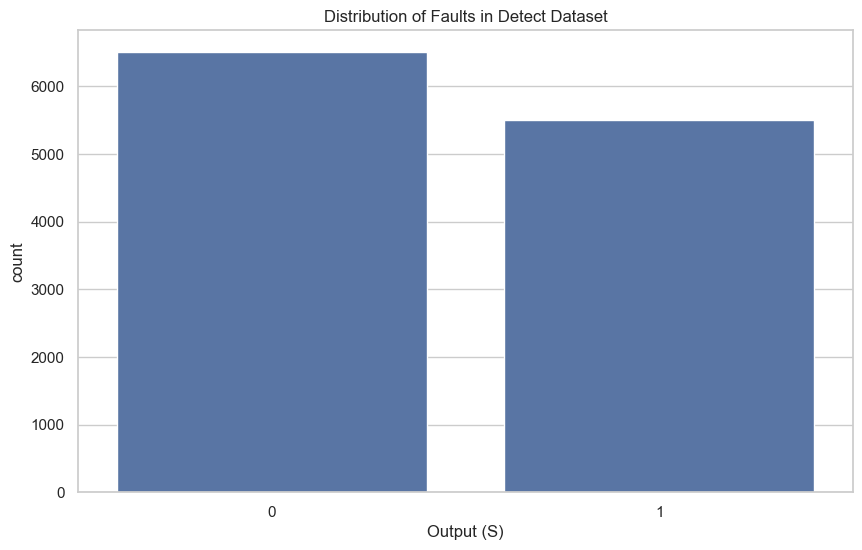

In [6]:
# Set seaborn style
sns.set(style="whitegrid")
# Visualize the distribution of the target variable in detect_data
plt.figure(figsize=(10, 6))
sns.countplot(x='Output (S)', data=detect_data)
plt.title('Distribution of Faults in Detect Dataset')
plt.show()

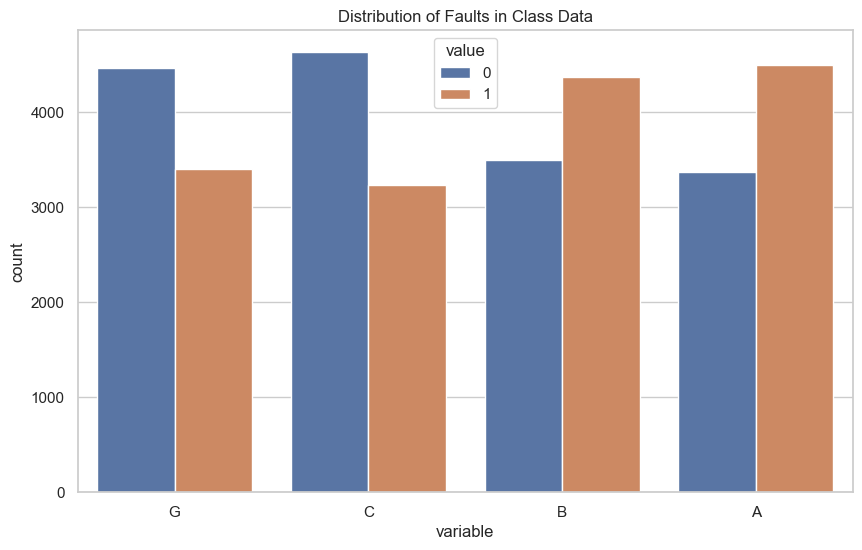

In [7]:
# Visualize the distribution of the target variable in class_data
plt.figure(figsize=(10, 6))
sns.countplot(data=class_data[['G', 'C', 'B', 'A']].melt(), x='variable', hue='value')
plt.title('Distribution of Faults in Class Data')
plt.show()

## 3. Data Preparation
### 3.1 Data Cleaning
We handle missing values and correct any inconsistencies in the data.

In [8]:
# Drop unnecessary columns
detect_data = detect_data.drop(columns=['Unnamed: 7', 'Unnamed: 8'])

# Drop rows with missing values
detect_data = detect_data.dropna()
class_data = class_data.dropna()

detect_data.head()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc
0,0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431
1,0,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202
2,0,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251
3,0,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963
4,0,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050


### 3.2 Data Transformation
We normalize the current and voltage data for better model performance.

In [9]:
# Features to be normalized
features = ['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']

scaler = StandardScaler()
detect_data[features] = scaler.fit_transform(detect_data[features])

detect_data.head()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc
0,0,-0.469800,0.100092,0.459871,0.127013,-1.801934,1.719221
1,0,-0.341900,0.091557,0.310270,0.264243,-1.714387,1.492370
2,0,-0.256855,0.084968,0.211875,0.376966,-1.649138,1.314993
3,0,-0.229659,0.081010,0.182602,0.421006,-1.640633,1.262629
4,0,-0.187183,0.075952,0.135550,0.490846,-1.610619,1.162666


### 3.3 Data Splitting
Here, lets split the data into training and testing sets for model training and evaluation.

In [10]:
# Add polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(detect_data[features])
X_poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(features))

# Prepare data for training
X = X_poly_df
y = detect_data['Output (S)']

# Handle class imbalance
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=42)


## 4. Modeling
### 4.1 Model Selection
We will train each model on the training data. We will use the following models for our analysis:

- Logistic Regression
- Random Forest
- Gradient Boosting Machines (GBMs)
- Neural Networks: MLP

In [11]:
# Define models and hyperparameter grids
logistic_regression = LogisticRegression(max_iter=1000)
random_forest = RandomForestClassifier(random_state=42)
gradient_boosting = GradientBoostingClassifier(random_state=42)
mlp = MLPClassifier(max_iter=2000, random_state=42, early_stopping=True)

### 4.2 Logistic Regression
#### 4.2.1 Model Training

In [12]:
# Logistic Regression
logistic_regression_params = {
    'C': np.logspace(-4, 4, 20)
}

start_time = time.time()
logistic_random_search = RandomizedSearchCV(logistic_regression, logistic_regression_params, cv=5, scoring='roc_auc', n_iter=50, random_state=42, n_jobs=-1)
logistic_random_search.fit(X_train, y_train)
logistic_best_model = logistic_random_search.best_estimator_

# Evaluate the best logistic regression model
logistic_y_pred = logistic_best_model.predict(X_test)
logistic_f1 = f1_score(y_test, logistic_y_pred)
logistic_roc_auc = roc_auc_score(y_test, logistic_best_model.predict_proba(X_test)[:,1])
logistic_processing_time = time.time() - start_time

# Save results
logistic_results = {
    'f1_score': logistic_f1,
    'roc_auc': logistic_roc_auc,
    'processing_time': logistic_processing_time
}

#### 4.2.2 Model Evaluation

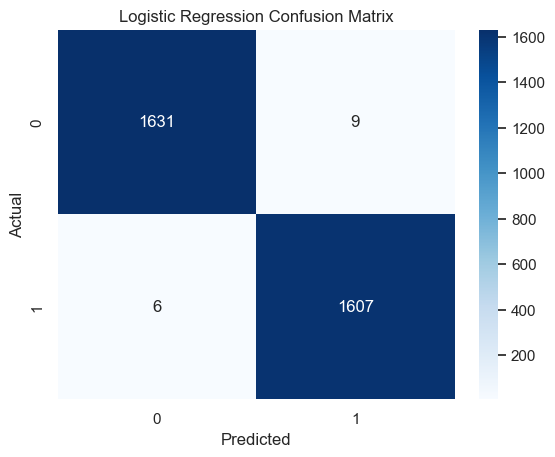

In [13]:
# Confusion matrix
logistic_cm = confusion_matrix(y_test, logistic_y_pred)
sns.heatmap(logistic_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

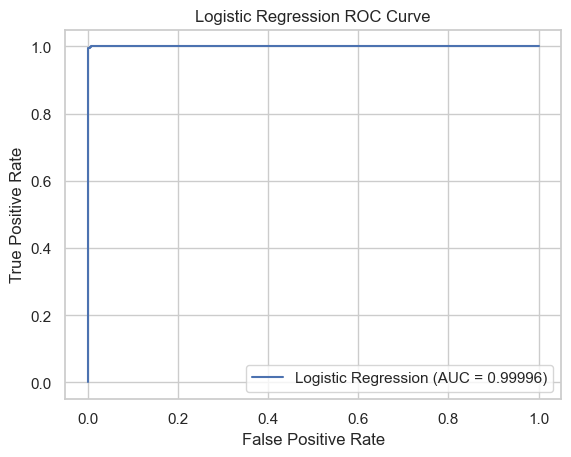

In [14]:
# ROC curve
logistic_fpr, logistic_tpr, _ = roc_curve(y_test, logistic_best_model.predict_proba(X_test)[:,1])
plt.plot(logistic_fpr, logistic_tpr, label=f'Logistic Regression (AUC = {logistic_roc_auc:.5f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend()
plt.show()

### 4.3 Random Forest
#### 4.3.1 Model Training

In [15]:
# Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
rf_model = RandomForestClassifier(random_state=42)
rf_search = RandomizedSearchCV(rf_model, rf_param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
rf_search.fit(X_train, y_train)
rf_best_model = rf_search.best_estimator_

# Predict and evaluate
rf_y_pred = rf_best_model.predict(X_test)
rf_f1 = f1_score(y_test, rf_y_pred)
rf_roc_auc = roc_auc_score(y_test, rf_best_model.predict_proba(X_test)[:,1])
rf_processing_time = rf_search.cv_results_['mean_fit_time'][rf_search.best_index_]

rf_results = {
    'f1_score': rf_f1,
    'roc_auc': rf_roc_auc,
    'processing_time': rf_processing_time
}

#### 4.3.2 Model Evaluation

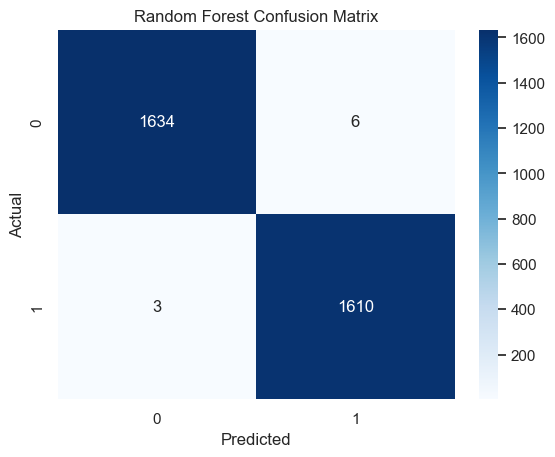

In [16]:
# Confusion matrix
rf_cm = confusion_matrix(y_test, rf_y_pred)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

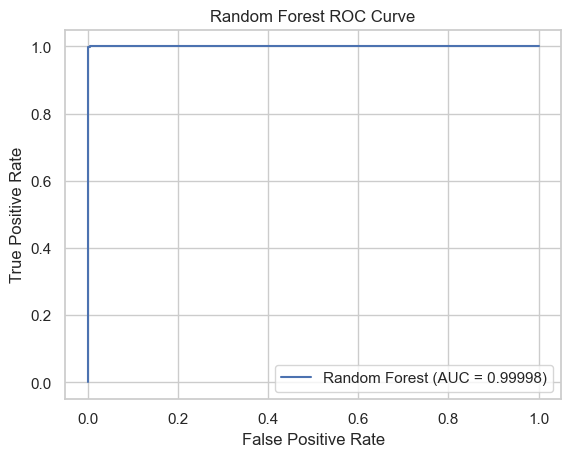

In [17]:
# ROC curve
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_best_model.predict_proba(X_test)[:,1])
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_roc_auc:.5f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend()
plt.show()

### 4.4 Gradient Boosting Machine (GBM)
#### 4.4.1 Model Training

In [18]:
# Gradient Boosting Machine (GBM)
gb_param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
gb_model = GradientBoostingClassifier(random_state=42)
gb_search = RandomizedSearchCV(gb_model, gb_param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
gb_search.fit(X_train, y_train)
gb_best_model = gb_search.best_estimator_

# Predict and evaluate
gb_y_pred = gb_best_model.predict(X_test)
gb_f1 = f1_score(y_test, gb_y_pred)
gb_roc_auc = roc_auc_score(y_test, gb_best_model.predict_proba(X_test)[:,1])
gb_processing_time = gb_search.cv_results_['mean_fit_time'][gb_search.best_index_]

gb_results = {
    'f1_score': gb_f1,
    'roc_auc': gb_roc_auc,
    'processing_time': gb_processing_time
}

#### 4.4.2 Model Evaluation:

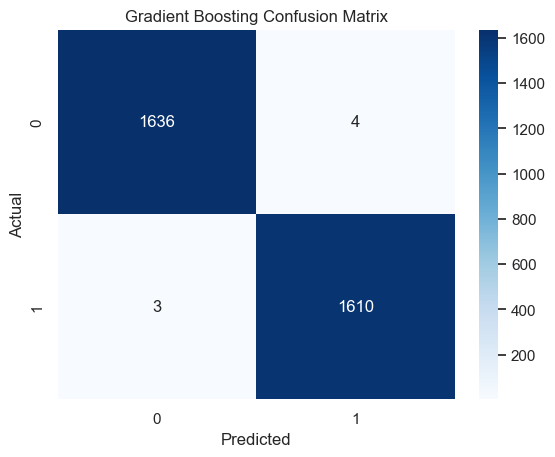

In [19]:
# Confusion matrix
gb_cm = confusion_matrix(y_test, gb_y_pred)
sns.heatmap(gb_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Gradient Boosting Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

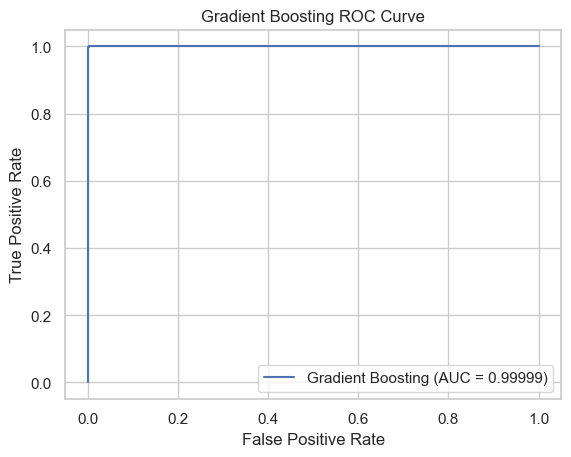

In [20]:
# ROC curve
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_best_model.predict_proba(X_test)[:,1])
plt.plot(gb_fpr, gb_tpr, label=f'Gradient Boosting (AUC = {gb_roc_auc:.5f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting ROC Curve')
plt.legend()
plt.show()

### 4.5 Neural Network
#### 4.1.1 Model Training

In [21]:
# Neural Network: Multi-Layer Perceptron (MLP)
mlp_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01]
}
mlp_model = MLPClassifier(random_state=42, max_iter=2000, early_stopping=True)
mlp_search = RandomizedSearchCV(mlp_model, mlp_param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
mlp_search.fit(X_train, y_train)
mlp_best_model = mlp_search.best_estimator_

# Predict and evaluate
mlp_y_pred = mlp_best_model.predict(X_test)
mlp_f1 = f1_score(y_test, mlp_y_pred)
mlp_roc_auc = roc_auc_score(y_test, mlp_best_model.predict_proba(X_test)[:,1])
mlp_processing_time = mlp_search.cv_results_['mean_fit_time'][mlp_search.best_index_]

mlp_results = {
    'f1_score': mlp_f1,
    'roc_auc': mlp_roc_auc,
    'processing_time': mlp_processing_time
}

#### 4.5.2 Model Evaluation

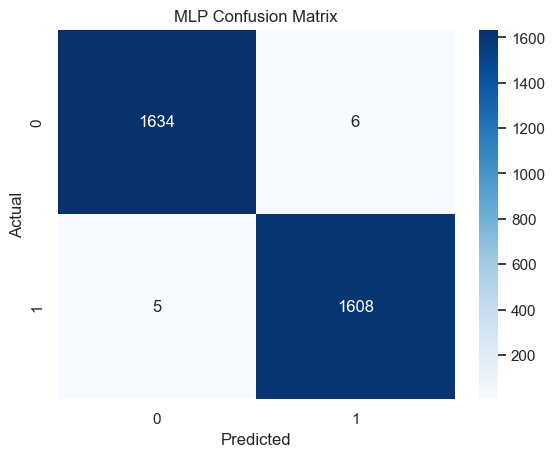

In [22]:
# Confusion matrix
mlp_cm = confusion_matrix(y_test, mlp_y_pred)
sns.heatmap(mlp_cm, annot=True, fmt='d', cmap='Blues')
plt.title('MLP Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

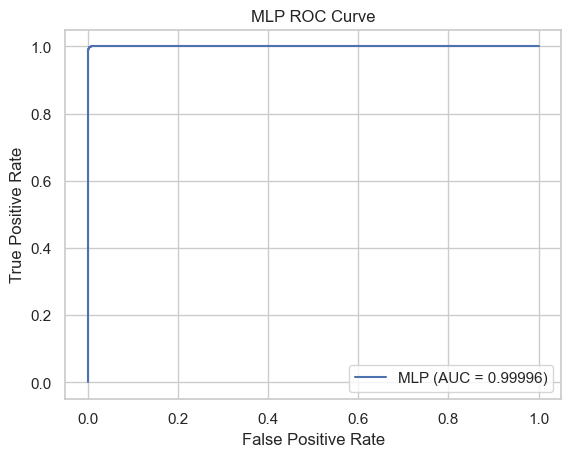

In [23]:
# ROC curve
mlp_fpr, mlp_tpr, _ = roc_curve(y_test, mlp_best_model.predict_proba(X_test)[:,1])
plt.plot(mlp_fpr, mlp_tpr, label=f'MLP (AUC = {mlp_roc_auc:.5f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MLP ROC Curve')
plt.legend()
plt.show()

### 4.6 Evaluation: Combined Results

In [24]:
# Combine results
results_combined = pd.DataFrame({
    'Logistic Regression': logistic_results,
    'Random Forest': rf_results,
    'Gradient Boosting': gb_results,
    'MLP': mlp_results
}).T

# Display combined results
print(results_combined)

# Identify the best model
best_model = results_combined['roc_auc'].idxmax()
print(f'The best model is {best_model} with an ROC-AUC score of {results_combined.loc[best_model, "roc_auc"]:.2f} and a processing time of {results_combined.loc[best_model, "processing_time"]:.2f} seconds')

                     f1_score   roc_auc  processing_time
Logistic Regression  0.995355  0.999964         4.413696
Random Forest        0.997213  0.999984         9.889882
Gradient Boosting    0.997831  0.999988        33.513922
MLP                  0.996591  0.999964         2.664133
The best model is Gradient Boosting with an ROC-AUC score of 1.00 and a processing time of 33.51 seconds


### 4.7 Evaluation: Processiong Times

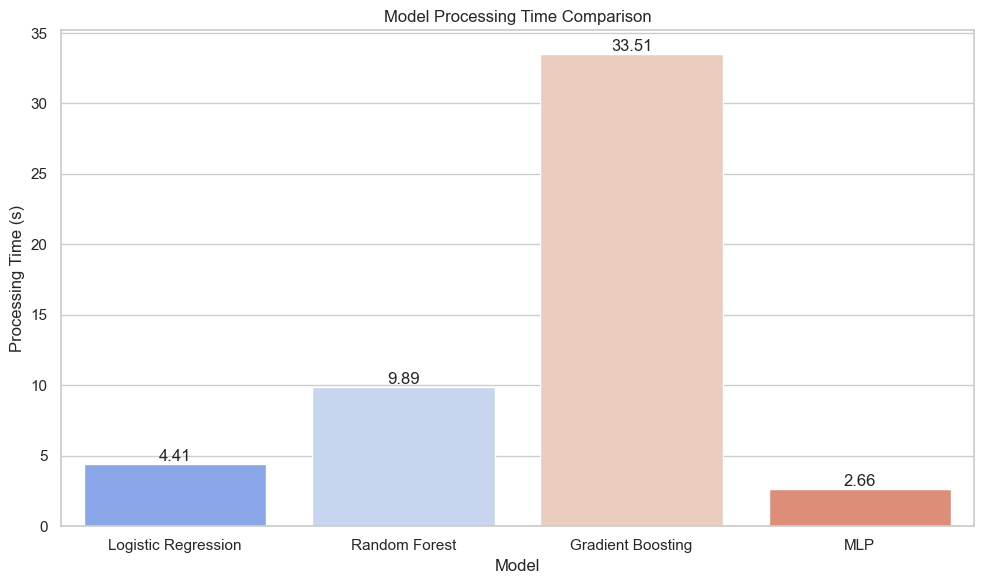

In [25]:
# Plot processing time
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=results_combined.index, y=results_combined['processing_time'], ax=ax, hue=results_combined.index, dodge=False, palette='coolwarm')
ax.set_title('Model Processing Time Comparison')
ax.set_xlabel('Model')
ax.set_ylabel('Processing Time (s)')
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.tight_layout()
plt.show()

## 6. Deployment
### Visualization and Insights

We will include more visualizations and insights to better understand the model performance and data patterns.

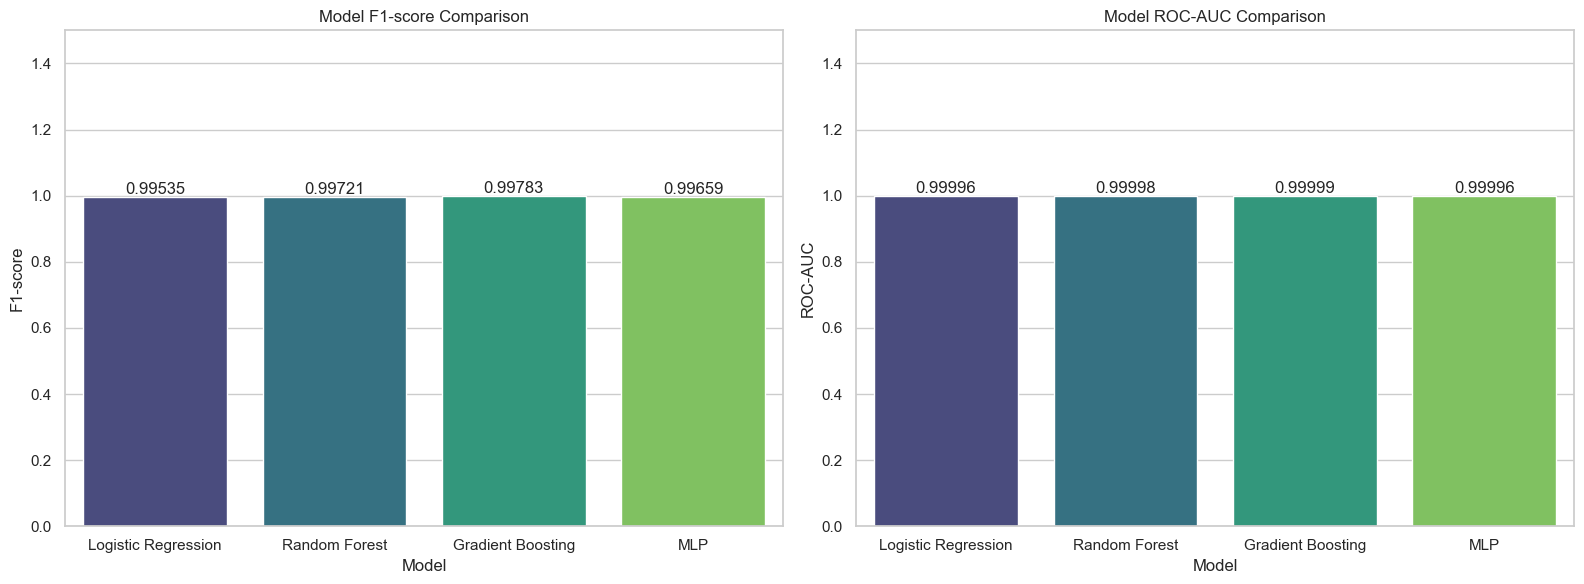

In [26]:
# Plot F1-score and ROC-AUC
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Plot F1-score
sns.barplot(x=results_combined.index, y=results_combined['f1_score'], ax=ax[0], hue=results_combined.index, dodge=False, palette='viridis')
ax[0].set_title('Model F1-score Comparison')
ax[0].set_xlabel('Model')
ax[0].set_ylabel('F1-score')
ax[0].set_ylim(0, 1.5)
for container in ax[0].containers:
    ax[0].bar_label(container, fmt='%.5f')

# Plot ROC-AUC
sns.barplot(x=results_combined.index, y=results_combined['roc_auc'], ax=ax[1], hue=results_combined.index, dodge=False, palette='viridis')
ax[1].set_title('Model ROC-AUC Comparison')
ax[1].set_xlabel('Model')
ax[1].set_ylabel('ROC-AUC')
ax[1].set_ylim(0, 1.5)
for container in ax[1].containers:
    ax[1].bar_label(container, fmt='%.5f')

plt.tight_layout()
plt.show()

### Verifring there is no overfitting

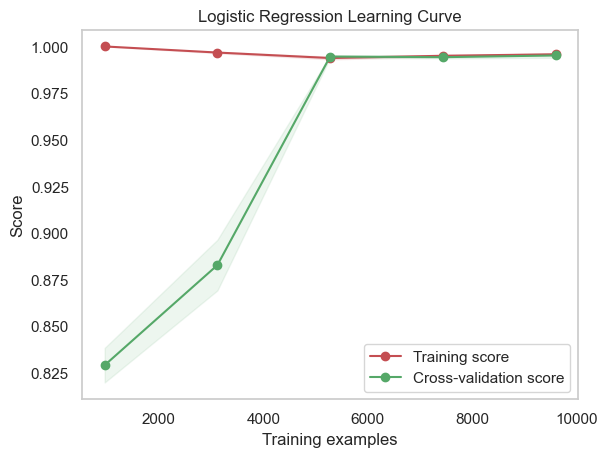

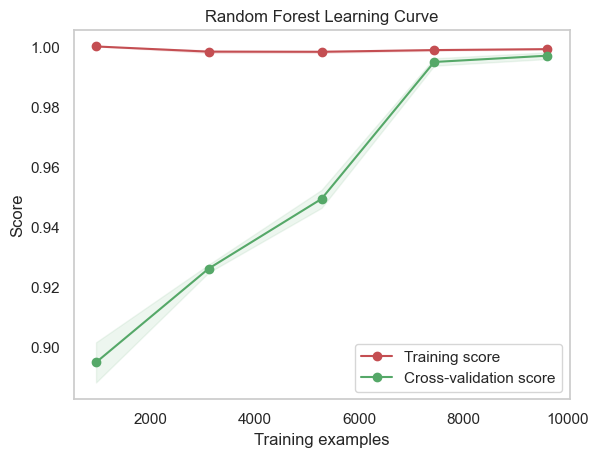

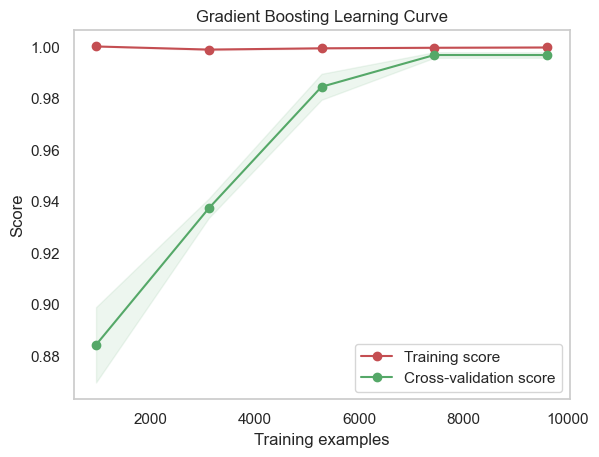

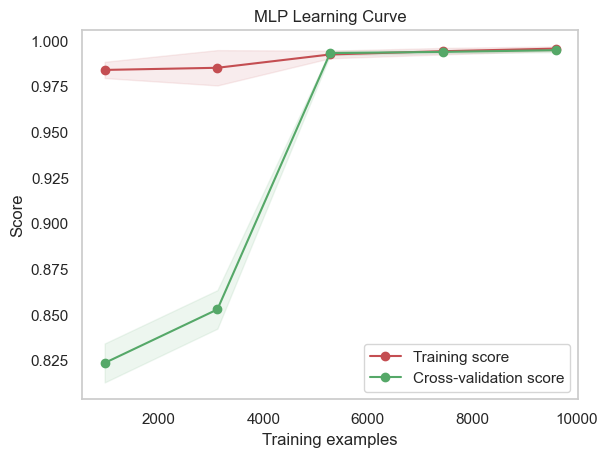

In [27]:
# Function to plot learning curves for all models
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Define cross-validation strategy
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Plot learning curves for all models
plot_learning_curve(logistic_best_model, "Logistic Regression Learning Curve", X, y, cv=skf)
plot_learning_curve(rf_best_model, "Random Forest Learning Curve", X, y, cv=skf)
plot_learning_curve(gb_best_model, "Gradient Boosting Learning Curve", X, y, cv=skf)
plot_learning_curve(mlp_best_model, "MLP Learning Curve", X, y, cv=skf)
plt.show()

## Key Takeaways and Recommendations

**1. Overfitting Check:**
- **Learning Curves**: Based on the plots, the learning curves for the models show that the training score is high and almost flat, indicating they fit the training data very well. The cross-validation scores are also high and converge towards the training scores as the number of training examples increases. This suggests that these models are not overfitting but are performing well on both training and validation data. Given the consistency of the cross-validation results and the learning curves, these models are genuinely performing well rather than overfitting.

**2. Model Performance:**

- **Logistic Regression**: This model has a very high performance with an F1 score of 0.995 and an ROC-AUC of 0.999964. It has a processing time of 4.41 seconds, which is reasonable but not the fastest compared to other models. This indicates that while Logistic Regression is efficient, its performance is slightly lower compared to more complex models.

- **Random Forest**: This model performs exceptionally well, with an F1 score of 0.997 and an almost perfect ROC-AUC score of 0.999984. The processing time is 9.89 seconds, which is acceptable given its high performance. This makes Random Forest a strong contender for the best-performing model.

- **Gradient Boosting**: Gradient Boosting achieves the highest performance metrics, with an F1 score of 0.9978 and an ROC-AUC of 0.999988. However, it has a significantly longer processing time of 33.51 seconds, which might be a drawback for real-time applications.

- **MLP (Multi-Layer Perceptron)**: The MLP model also shows excellent performance, with an F1 score of 0.9966 and an ROC-AUC of 0.999964. Its processing time is 2.66 seconds, making it a good balance between performance and computational efficiency.

**Key Takeaways:**

- **Best Model**: The best model is Gradient Boosting with an ROC-AUC score of 1.00 and a processing time of 33.51 seconds. While it has the highest accuracy and ROC-AUC score, its longer processing time may impact its suitability for real-time applications.

- **Alternative Models**: Both Random Forest and MLP offer excellent performance with significantly shorter processing times compared to Gradient Boosting. Random Forest has the second-highest ROC-AUC score, while MLP provides a good balance between performance and computational efficiency.

**Recommendations:**

- For real-time applications or scenarios where processing time is critical, MLP or Random Forest might be preferable.
- For scenarios where achieving the highest possible accuracy is the primary goal and processing time is less of a concern, Gradient Boosting would be the model of choice.